In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mpl

<font color=red> Load data </font>

In [4]:
df_train = pd.read_csv('data/titanic_train.csv')
df_test = pd.read_csv('data/titanic_test.csv')

In [3]:
# List first 5 rows
df_train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
1,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
2,131,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,NaN,C
3,1106,1,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S
4,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S


<font  color=orange> Visualizing data</font>

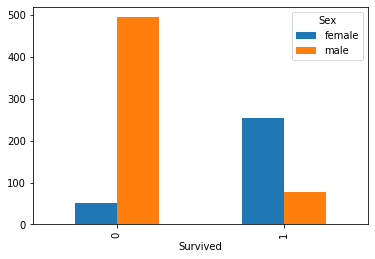

In [4]:
df_train.groupby(['Sex', 'Survived'] )['Survived'].count().unstack('Sex').plot(kind='bar')

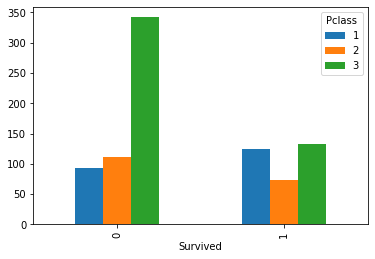

In [6]:
df_train.groupby(['Pclass', 'Survived'] )['Survived'].count().unstack('Pclass').plot(kind='bar')

<font color=red> Checking missing/categorical data </font>

In [6]:
#train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  877 non-null    int64  
 1   Survived     877 non-null    int64  
 2   Pclass       877 non-null    int64  
 3   Name         877 non-null    object 
 4   Sex          877 non-null    object 
 5   Age          700 non-null    float64
 6   SibSp        877 non-null    int64  
 7   Parch        877 non-null    int64  
 8   Ticket       877 non-null    object 
 9   Fare         876 non-null    float64
 10  Cabin        200 non-null    object 
 11  Embarked     876 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.3+ KB


In [7]:
#test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  432 non-null    int64  
 1   Pclass       432 non-null    int64  
 2   Name         432 non-null    object 
 3   Sex          432 non-null    object 
 4   Age          346 non-null    float64
 5   SibSp        432 non-null    int64  
 6   Parch        432 non-null    int64  
 7   Ticket       432 non-null    object 
 8   Fare         432 non-null    float64
 9   Cabin        95 non-null     object 
 10  Embarked     431 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 37.2+ KB


<font color=red>
PassengerId, Ticket : Useless info.
    
Age, Cabin: a lot of missing data
    </font>

In [11]:
#drop some features
df_train_1 = df_train.drop(['PassengerId', 'Ticket', 'Age', 'Cabin'], axis=1)
df_test_1 = df_test.drop(['PassengerId', 'Ticket', 'Age', 'Cabin'], axis=1)
#do not delete rows in the test

In [12]:
#check again
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  877 non-null    int64  
 1   Pclass    877 non-null    int64  
 2   Name      877 non-null    object 
 3   Sex       877 non-null    object 
 4   SibSp     877 non-null    int64  
 5   Parch     877 non-null    int64  
 6   Fare      876 non-null    float64
 7   Embarked  876 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 54.9+ KB


<font color=red> Handling **Name** </font>

In [10]:
df_train_1['Name'][:5]

0                      Beesley, Mr. Lawrence
1    Andersson, Master. Sigvard Harald Elias
2                       Drazenoic, Mr. Jozef
3     Andersson, Miss. Ida Augusta Margareta
4             Porter, Mr. Walter Chamberlain
Name: Name, dtype: object

<font color=red> Extracting title </font>

In [14]:
df_train_1['Title'] = df_train_1['Name'].str.extract('([A-Za-z]+)\.',expand=True)
df_test_1['Title'] = df_test_1['Name'].str.extract('([A-Za-z]+)\.',expand=True)

In [15]:
df_train_1['Title'][:5]

0        Mr
1    Master
2        Mr
3      Miss
4        Mr
Name: Title, dtype: object

<font color=orange> Regex tutorial:
    https://medium.com/factory-mind/regex-tutorial-a-simple-cheatsheet-by-examples-649dc1c3f285
        </font>

<font color=red> Combining Title columns from **Train** and **Test** </font>

In [17]:
all_title = df_train_1["Title"].tolist() + df_test_1['Title'].tolist()

<font color=red> Using **Label Encoder** to convert Title </font>

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(all_title)

LabelEncoder()

In [19]:
df_train_1['Title_labelcoded'] = le.transform(df_train_1["Title"])

In [20]:
df_test_1['Title_labelcoded'] = le.transform(df_test_1["Title"])

In [21]:
#check first 3 rows
df_train_1.head(3)

,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Title,Title_labelcoded
0,1,2,"Beesley, Mr. Lawrence",male,0,0,13.0000,S,Mr,13
1,0,3,"Andersson, Master. Sigvard Harald Elias",male,4,2,31.2750,S,Master,9
2,0,3,"Drazenoic, Mr. Jozef",male,0,0,7.8958,C,Mr,13


<font color=red> Drop **Title** and **Name** columns </font>

In [22]:
df_train_2 = df_train_1.drop(['Title', 'Name'], axis=1)
df_test_2 = df_test_1.drop(['Title', 'Name'], axis=1)

<font color=red> Sex is a categorical feature </font>

<font color=red> We convert it using the label encoder </font>

In [30]:
le = preprocessing.LabelEncoder()
le.fit(df_train_2['Sex'])
df_train_2['Sex_labelcoded'] = le.transform(df_train_2['Sex'])
df_test_2['Sex_labelcoded'] = le.transform(df_test_2['Sex'])

In [31]:
df_train_2[:5]

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title_labelcoded,Sex_labelcoded
0,1,2,male,0,0,13.0000,S,13,1
1,0,3,male,4,2,31.2750,S,9,1
2,0,3,male,0,0,7.8958,C,13,1
3,1,3,female,4,2,7.7750,S,10,0
4,0,1,male,0,0,52.0000,S,13,1


In [26]:
#df_train_2['Sex'] = pd.Categorical(df_train_2['Sex'])
#df_test_2['Sex'] = pd.Categorical(df_test_2['Sex'])

In [27]:
#df_dummy_train = pd.get_dummies(df_train_2['Sex'], prefix = 'Sex')
#df_dummy_test = pd.get_dummies(df_test_2['Sex'], prefix = 'Sex')

In [28]:
#df_dummy_train[:2]

<font color=red> Concatenating dummy dataframes to our exisitng dataframes </font>

In [ ]:
#df_train_3 = pd.concat([???, ???], axis=1)
#df_test_3 = pd.concat([???, ???], axis=1)

In [ ]:
#check first 3 rows

<font color=red> Drop Sex feature </font>

In [33]:
df_train_3 = df_train_2.drop(['Sex'], axis=1)
df_test_3 = df_test_2.drop(['Sex'], axis=1)

<font color=red> Check our data again for another missing/categorical features</font>

In [36]:
# check training data
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          877 non-null    int64  
 1   Pclass            877 non-null    int64  
 2   SibSp             877 non-null    int64  
 3   Parch             877 non-null    int64  
 4   Fare              876 non-null    float64
 5   Embarked          876 non-null    object 
 6   Title_labelcoded  877 non-null    int64  
 7   Sex_labelcoded    877 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 54.9+ KB


In [35]:
# check test data
df_test_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            432 non-null    int64  
 1   SibSp             432 non-null    int64  
 2   Parch             432 non-null    int64  
 3   Fare              432 non-null    float64
 4   Embarked          431 non-null    object 
 5   Title_labelcoded  432 non-null    int64  
 6   Sex_labelcoded    432 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 23.8+ KB


<font color=red> Fare/Embarked</font>

<font color=red>Handling missing Fare data in the training </font>

In [ ]:
???

In [ ]:
#check

<font color=red> Handling **Embarked** in both **training/testing** data</font>

<font color=red> Missing Embarked </font>

In [ ]:
df_train[df_train['Embarked'].isnull()]

<font color=orange> Googling for **Embarked** information</font>

https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

In [ ]:
# update

In [ ]:
# check

In [ ]:
df_test[df_test['Embarked'].isnull()]

<font color=orange> Googling for **Embarked** information</font>

https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html

In [ ]:
#update

In [ ]:
#check

<font color=red> Converting Embarked via label encoder </font>

In [ ]:
le = preprocessing.LabelEncoder()
all_Embarked = df_train_6['Embarked'].tolist() + df_test_6['Embarked'].tolist()
le.fit(all_Embarked)

In [ ]:
# transform

In [ ]:
# transform

In [ ]:
# drop Embarked


<font color=red> Correlation Matrix</font>

In [ ]:
sns.set()
plt.subplots(figsize = (10, 10))
sns.heatmap(df_train_7.corr(), annot=True, cmap=plt.get_cmap("jet"))
plt.title("Feature Correlations", fontsize = 18)